In [1]:
import re
from collections import Counter
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
!powershell -command "wget http://ai.stanford.edu/~amaas/data/sentiment/ -outfile aclImdb_v1.tar.gz"


In [3]:
ls

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は D675-8CD3 です

 C:\Users\ykenk\dive\diveintocode-ml\Term_2\Sprint_21 のディレクトリ

2019/10/19  14:39    <DIR>          .
2019/10/19  14:39    <DIR>          ..
2019/09/26  13:18    <DIR>          .ipynb_checkpoints
2019/09/28  11:16    <DIR>          aclImdb
2019/10/19  14:40             2,713 aclImdb_v1.tar.gz
2019/09/26  15:05    <DIR>          data
2019/10/19  14:39         3,043,011 Sprint_21.ipynb
2019/09/26  13:22           986,253 Sprint21_1907.pdf
               3 個のファイル           4,031,977 バイト
               5 個のディレクトリ  122,135,773,184 バイトの空き領域


In [4]:
ls

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は D675-8CD3 です

 C:\Users\ykenk\dive\diveintocode-ml\Term_2\Sprint_21 のディレクトリ

2019/10/19  14:39    <DIR>          .
2019/10/19  14:39    <DIR>          ..
2019/09/26  13:18    <DIR>          .ipynb_checkpoints
2019/09/28  11:16    <DIR>          aclImdb
2019/10/19  14:40             2,713 aclImdb_v1.tar.gz
2019/09/26  15:05    <DIR>          data
2019/10/19  14:39         3,043,011 Sprint_21.ipynb
2019/09/26  13:22           986,253 Sprint21_1907.pdf
               3 個のファイル           4,031,977 バイト
               5 個のディレクトリ  122,135,773,184 バイトの空き領域


In [5]:
# IMDBをカレントフォルダにダウンロード
#!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

tar: Error opening archive: Unrecognized archive format
'rm' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'cat' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


In [6]:
# aclImdb/train/unsupはラベル無しのため削除
!rm aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

'rm' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。
'cat' は、内部コマンドまたは外部コマンド、
操作可能なプログラムまたはバッチ ファイルとして認識されていません。


Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a score >= 7 out of 10. Thus reviews with
more neutral ratings are not included in the train/test sets. In the
unsupervised set, reviews of any rating are included and there are an
even number of reviews > 5 and <= 5.

Files

There are two top-level directories [train/, test/] corresponding to
the training and test sets. Each contains [pos/, neg/] directories for
the reviews with binary labels positive and negative. Within these
directories, reviews are stored in text files named following the
convention [[id]_[rating].txt] where [id] is a unique id and [rating] is
the star rating for that review on a 1-10 scale. For example, the file
[test/pos/200_8.txt] is the text for a positive-labeled test set
example with unique id 200 and star rating 8/10 from IMDb. The
[train/unsup/] directory has 0 for all ratings because the ratings are
omitted for this portion of the dataset.

We also include the IMDb URLs for each review in a separate
[urls_[pos, neg, unsup].txt] file. A review with unique id 200 will
have its URL on line 200 of this file. Due the ever-changing IMDb, we
are unable to link directly to the review, but only to the movie's
review page.

In addition to the review text files, we include already-tokenized bag
of words (BoW) features that were used in our experiments. These 
are stored in .feat files in the train/test directories. Each .feat
file is in LIBSVM format, an ascii sparse-vector format for labeled
data.  The feature indices in these files start from 0, and the text
tokens corresponding to a feature index is found in [imdb.vocab]. So a
line with 0:7 in a .feat file means the first word in [imdb.vocab]
(the) appears 7 times in that review.

LIBSVM page for details on .feat file format:
http://www.csie.ntu.edu.tw/~cjlin/libsvm/

We also include [imdbEr.txt] which contains the expected rating for
each token in [imdb.vocab] as computed by (Potts, 2011). The expected
rating is a good way to get a sense for the average polarity of a word
in the dataset.

Citing the dataset

When using this dataset please cite our ACL 2011 paper which
introduces it. This paper also contains classification results which
you may want to compare against.


@InProceedings{maas-EtAl:2011:ACL-HLT2011,
  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
  title     = {Learning Word Vectors for Sentiment Analysis},
  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
  month     = {June},
  year      = {2011},
  address   = {Portland, Oregon, USA},
  publisher = {Association for Computational Linguistics},
  pages     = {142--150},
  url       = {http://www.aclweb.org/anthology/P11-1015}
}

References

Potts, Christopher. 2011. On the negativity of negation. In Nan Li and
David Lutz, eds., Proceedings of Semantics and Linguistic Theory 20,
636-659.

Contact

For questions/comments/corrections please contact Andrew Maas
amaas@cs.stanford.edu


大規模な映画レビューデータセットv1.0  

概要  

このデータセットには、映画レビューとそれに関連付けられたバイナリ感情極性ラベルが含まれています。センチメント分類のベンチマークとして機能することを目的としています。このドキュメントでは、データセットが収集された方法と、提供されたファイルの使用方法について説明します。  

データセット  

コアデータセットには、25,000のトレインセットと25,000のテストセットに均等に分割された50,000件のレビューが含まれています。ラベルの全体的な分布はバランスが取れています（25k posと25kネガ）。また、教師なし学習用にラベルなしのドキュメントを50,000個追加します。  

コレクション全体では、同じ映画のレビューに相関評価が付けられる傾向があるため、特定の映画には30件を超えるレビューは許可されません。さらに、トレインおよびテストセットにはばらばらの映画セットが含まれているため、映画固有の用語とそれらの観測されたラベルに関連するものを記憶しても、重要なパフォーマンスは得られません。ラベル付きのトレイン/テストセットでは、ネガティブレビューのスコアは10点中4点以下であり、ポジティブレビューのスコアは10点中7点以上です。したがって、より中立的な評価のレビューはトレイン/テストセットに含まれません。 。教師なしセットには、あらゆる評価のレビューが含まれており、5以上および5以下の偶数のレビューがあります。  

ファイル  

トレーニングセットとテストセットに対応する2つの最上位ディレクトリ[train /、test /]があります。それぞれには、レビュー用の[pos /、neg /]ディレクトリが含まれており、バイナリラベルはポジティブとネガティブです。これらのディレクトリ内で、レビューは[[id] _ [rating] .txt]という規則に従って名前が付けられたテキストファイルに保存されます。[id]は一意のIDで、[rating]は1〜10スケールのレビューの星評価です。たとえば、ファイル[test / pos / 200_8.txt]は、IMDbからの一意のID 200と星評価8/10のポジティブラベルテストセット例のテキストです。データセットのこの部分では評価が省略されているため、[train / unsup /]ディレクトリの評価はすべて0です。  

また、各レビューのIMDb URLを個別の[urls_ [pos、neg、unsup] .txt]ファイルに含めます。一意のID 200のレビューのURLは、このファイルの200行目にあります。IMDbは常に変化しているため、レビューに直接リンクすることはできませんが、映画のレビューページにのみリンクできます。  

レビューテキストファイルに加えて、実験で使用されたトークン化された単語の袋（BoW）機能が含まれています。これらはtrain / testディレクトリの.featファイルに保存されます。各.featファイルはLIBSVM形式、つまりラベル付きデータのASCIIスパースベクトル形式です。これらのファイルの機能インデックスは0から始まり、機能インデックスに対応するテキストトークンは[imdb.vocab]にあります。したがって、.featファイルの0：7の行は、[imdb.vocab]（the）の最初の単語がそのレビューで7回出現することを意味します。  
  
.featファイル形式の詳細については、LIBSVMページ：http ://www.csie.ntu.edu.tw/~cjlin/libsvm/  

また、[imdbEr.txt]には、（Potts、2011）によって計算された[imdb.vocab]の各トークンの予想される評価が含まれています。予想される評価は、データセット内の単語の平均極性を把握するための良い方法です。  

データセットの引用  

このデータセットを使用するときは、それを紹介するACL 2011の論文を引用してください。このペーパーには、比較したい分類結果も含まれています。  
 
@InProceedings {maas-EtAl：2011：ACL-HLT2011、author = {Maas、Andrew L. and Daly、Raymond E. and Pham、Peter T. and Huang、Dan and Ng、Andrew Y. and Potts、Christopher}、タイトル= {感情分析のための単語ベクトルの学習}、booktitle = {第49回計算言語学協会年次総会の議事録：Human Language Technologies}、月= {6月}、年= {2011}、住所= {オレゴン州ポートランド、米国}、出版社= {計算言語学協会}、ページ= {142--150}、url = { http://www.aclweb.org/anthology/P11-1015} }  

参照資料  

ポッツ、クリストファー。2011.否定の否定性について。ナン・リーおよびデビッド・ルッツ編、「意味論および言語理論集20、636-659」。  

接触  

質問/コメント/修正については、Andrew Maas amaas@cs.stanford.eduまでご連絡ください

In [7]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [8]:
print(len(x_train))

25000


In [9]:
print(len(y_train))
print(len(x_test))

25000
25000


In [10]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [11]:
print("x: {}".format(x_train[:3]))

x: ["Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.", 'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many cli

In [12]:
mini_dataset = \
  ["This movie is very good.",\
   "This film is a good",\
   "Very bad. Very, very bad."]

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
print(vectorizer)

bow = (vectorizer.fit_transform(mini_dataset)).toarray()
print("bow\n{}".format(bow))

print("feature_name\n{}".format(vectorizer.get_feature_names()))
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w+\\b',
                tokenizer=None, vocabulary=None)
bow
[[0 0 0 1 1 1 1 1]
 [1 0 1 1 1 0 1 0]
 [0 2 0 0 0 0 0 3]]
feature_name
['a', 'bad', 'film', 'good', 'is', 'movie', 'this', 'very']


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


例にあげた3文の中で登場する8種類の単語が列名になり、0,1,2番目のサンプルでそれらが何回登場しているかを示しています。2番目のサンプル「Very bad. Very, very bad.」ではbadが2回、veryが3回登場しています。列名になっている言葉はデータセットが持つ 語彙 と呼びます。

テキストはBoWにより各サンプルが語彙数の次元を持つ特徴量となり、機械学習モデルへ入力できるようになります。この時使用したテキスト全体のことを コーパス と呼びます。語彙はコーパスに含まれる言葉よって決まり、それを特徴量としてモデルの学習を行います。そのため、テスト用データではじめて登場する語彙はベクトル化される際に無視されます。

# 【問題1】BoWのスクラッチ実装

In [14]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [15]:
# test文
test_dataset = ["This movie is SOOOO funny!!!",\
                "What a movie! I never",\
                "best movie ever!!!!! this movie"]

In [16]:
print(len(test_dataset))

3


In [17]:
#文字列を抽出しリスト化する関数
def split_sentence(sentence):
    #大文字を小文字変換
    new_sentence = sentence.lower()
    #記号等を消す
    new_sentence = new_sentence.replace(r'!', ' ').replace('<br />', ' ').\
    replace('/', ' ').replace('.', ' ').replace("'", ' ').replace('"', ' ').\
    replace(',', ' ').replace('(', ' ').replace(')', ' ').replace(':', ' ')\
    .replace(';', ' ').replace('?', ' ').replace('_', ' ').replace('-',' ').\
    replace('   ', ' ').replace('  ', ' ')
    
    #new_sentence = new_sentence.remove[-1]
    #スペースで文字列を区切る
    new_sentence = new_sentence.split()
    
    return new_sentence


def scratch_BoW(copus, n_grams):
    
    #tokenリスト
    token_list = []

    for data in copus:
        #文字列毎に抽出しリスト化
        data = split_sentence(data)
        num = n_grams-1
        for i in range(len(data)-num):
            #tokenを作る
            token = ' '.join(data[i:i+n_grams])

            if token not in token_list:
                #生成したtokenをリストに追加
                token_list.append(token)

    # sample数×token数の空配列
    bow_array = np.zeros((len(copus), len(token_list)), dtype=int)
    
    # 各サンプルごとのtokenをつくる。
    for j,sample in enumerate(copus):
        token_list_0 = []
        sample = split_sentence(sample)
        for k in range(len(sample)):
            token_0 = ' '.join(sample[k:k+n_grams])
            if token_0 not in token_list_0:
                token_list_0.append(token_0)

        for l,tkn in enumerate(token_list):
            count_tkn = token_list_0.count(tkn)
            bow_array[j][l] += count_tkn

    #辞書をデータフレーム化
    df = pd.DataFrame(bow_array, columns=token_list)

    return df

In [18]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 25000)

In [19]:
print(test_dataset)

['This movie is SOOOO funny!!!', 'What a movie! I never', 'best movie ever!!!!! this movie']


In [20]:
# 2_grams
display(scratch_BoW(test_dataset,n_grams=2))

,this movie,movie is,is soooo,soooo funny,what a,a movie,movie i,i never,best movie,movie ever,ever this
0,1,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,1,1,1


In [21]:
# 1_grams
display(scratch_BoW(test_dataset,n_grams=1))

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1,1,1,1,1,0,0,0,0,0,0
1,0,1,0,0,0,1,1,1,1,0,0
2,1,1,0,0,0,0,0,0,0,1,1


In [22]:
print(x_train[:2])

["Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.", 'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many cliché

In [23]:
#x_trainでBoW（1gram)
display(scratch_BoW(x_train[:5],n_grams=1))

,zero,day,leads,you,to,think,even,re,why,two,boys,young,men,would,do,what,they,did,commit,mutual,suicide,via,slaughtering,their,classmates,it,captures,must,be,beyond,a,bizarre,mode,of,being,for,humans,who,have,decided,withdraw,from,common,civility,in,order,define,own,world,coupled,destruction,is,not,perfect,movie,but,given,money,time,the,filmmaker,and,actors,had,remarkable,product,terms,explaining,motives,actions,murderers,better,than,elephant,film,that,gets,under,our,rationalistic,skin,far,almost,anything,are,likely,see,flawed,honest,with,terrible,honesty,words,can,t,describe,how,bad,this,i,explain,by,writing,only,too,yourself,get,at,grip,horrible,really,recommend,there,so,many,clichés,mistakes,all,other,negative,things,imagine,here,will,just,make,cry,start,technical,first,lot,regarding,airplane,won,list,them,mention,coloring,plane,didn,manage,show,an,airliner,colors,fictional,airline,instead,used,747,painted,original,boeing,livery,very,plot,stupid,has,been,done,times,before,much,ridiculous,moments,lost,count,early,also,was,on,guys,side,because,good,were,executive,decision,should,without,doubt,choice,over,one,turbulence,movies,fact,every,everyone,plays,part,pretty,well,little,nice,belushi,chance,live,his,life,differently,ends,up,realizing,he,going,as,or,maybe,shows,us,we,ought,take,advantage,opportunities,ones,cannot,if,u,video,around,$10,it´d,investment,highly,talented,filmmakers,germany,now,none,associated,producers,actually,invest,something,like,could,made,10,films,budget,garbage,s,entertaining,seven,grown,running,dwarfs,pretending,funny,though,producer,happens,oldest,guy,bunch,playing,youngest,dwarf,filled,scream,captions,saying,supposed,laugh,hard,believe,crap,comedy,people,stood,left,cinema,30,minutes,into,same,wasting,my,pain,ve,evidence,confirmed,suspicions,kids,14,22,put,dvd,titanic,fantastic,state,art,mega,screen,home,entertainment,type,deal,seen,moment,kate,leo,celine,dion,most,felt,whole,shortly,after,epic,started,restless,some,asking,others,call,when,iceberg,appears,hour,half,girls,still,shouting,stampede,followed,came,back,sinking,sat,open,mouthed,emitting,ohs,outs,thought,burst,scene,hours,waiting,bloody,thing,sink,about,rest,dr,zivagho,instance,similar,takes,place,within,period,teaches,spit,look,faces,hands,supposedly,creme,de,la,class,dining,room,ship,historical,details,find,storyline,thin,introduce,guns,shootings,real,standards,efforts,focus,special,effects,opening,week,went,become,highest,grossing,know
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#  【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テ
キストクリーニングやステミングなどの前処理はこの問題では要求しません。

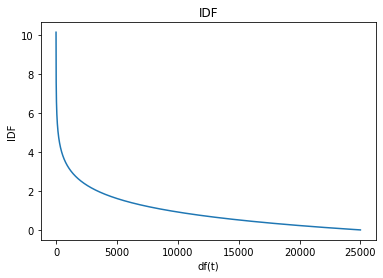

In [24]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [26]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words_0 = stopwords.words('english')
print(len(stop_words_0))
print("stop word : {}".format(stop_words_0))

179
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ykenk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
#インスタンス化
vectorizer = TfidfVectorizer(stop_words=stop_words_0,max_features = 5000)
#fitさせて、配列化
bow_train = (vectorizer.fit_transform(x_train)).toarray()
#データフレーム化
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df.head())


00  000        10  100   11   12   13  13th        14   15   16   17   18  \
0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.127480  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.085006  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.104143  0.0  0.0  0.0  0.0   

   1930  1930s  1933  1940  1950  1950s  1960  1960s  1968  1970  1970s  1971  \
0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
1   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
2   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
3   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
4   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   

   1972  1973  1980  1980s  1983  1984  1987  1990  1993  1995  1996  1997  \
0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   1999  1st   20  2000  2001  2002  2003  2004  2005  2006  2007  2008  20th  \
0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

    24   25  2nd        30  3000  30s   35   3d  3rd   40   45   50  50s   60  \
0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.135039   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   60s   70  70s   80  80s   90  90s   99  abandoned  abc  abilities  ability  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   

   able  abraham  absence  absent  absolute  absolutely  absurd  abuse  \
0   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
1   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
2   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
3   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
4   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   

   abusive  abysmal  academy  accent  accents  accept  acceptable  accepted  \
0      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
1      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
2      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
3      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
4      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   

   access  accident  accidentally  accompanied  accomplished  according  \
0     0.0       0.0           0.0          0.0           0.0        0.0   
1     0.0       0.0           

# 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。

ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [30]:
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


In [31]:
len(x_train)

25000

In [32]:
len(x_test)

25000

In [33]:
#x_train
#インスタンス化
vectorizer = TfidfVectorizer(stop_words=stop_words_0,max_features = 5000)
#fitさせて、配列化
bow_train = (vectorizer.fit_transform(x_train)).toarray()
#データフレーム化
# df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
# x_trainで使用したトークンを辞書化
vocabulary_dict = vectorizer.vocabulary_ 

In [34]:
print(vocabulary_dict.keys())

dict_keys(['zero', 'day', 'leads', 'think', 'even', 'two', 'boys', 'young', 'men', 'would', 'commit', 'suicide', 'via', 'captures', 'must', 'beyond', 'bizarre', 'humans', 'decided', 'common', 'order', 'world', 'destruction', 'br', 'perfect', 'movie', 'given', 'money', 'time', 'filmmaker', 'actors', 'remarkable', 'product', 'terms', 'explaining', 'motives', 'actions', 'better', 'elephant', 'film', 'gets', 'skin', 'far', 'almost', 'anything', 'likely', 'see', 'flawed', 'honest', 'terrible', 'honesty', 'words', 'describe', 'bad', 'explain', 'writing', 'get', 'horrible', 'really', 'recommend', 'many', 'clichés', 'mistakes', 'negative', 'things', 'imagine', 'make', 'cry', 'start', 'technical', 'first', 'lot', 'regarding', 'airplane', 'list', 'mention', 'plane', 'manage', 'show', 'colors', 'fictional', 'instead', 'used', 'painted', 'original', 'plot', 'stupid', 'done', 'times', 'much', 'ridiculous', 'moments', 'lost', 'count', 'early', 'also', 'guys', 'side', 'good', 'executive', 'decision',

In [35]:
#x_test
#インスタンス化（x_trainで使用したトーケンをtestデータに適用）
vectorizer = TfidfVectorizer(stop_words=stop_words_0, vocabulary=vocabulary_dict, max_features = 5000)
#fitさせて、配列化
bow_test = (vectorizer.fit_transform(x_test)).toarray()
#データフレーム化
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df.head())

00  000        10  100   11   12   13  13th        14   15   16   17   18  \
0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.127480  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.085006  0.0  0.0  0.0  0.0   0.0  0.000000  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.000000  0.0  0.0  0.0  0.0   0.0  0.104143  0.0  0.0  0.0  0.0   

   1930  1930s  1933  1940  1950  1950s  1960  1960s  1968  1970  1970s  1971  \
0   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
1   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
2   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
3   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
4   0.0    0.0   0.0   0.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   

   1972  1973  1980  1980s  1983  1984  1987  1990  1993  1995  1996  1997  \
0   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0   0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

   1999  1st   20  2000  2001  2002  2003  2004  2005  2006  2007  2008  20th  \
0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

    24   25  2nd        30  3000  30s   35   3d  3rd   40   45   50  50s   60  \
0  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.135039   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.000000   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   60s   70  70s   80  80s   90  90s   99  abandoned  abc  abilities  ability  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0        0.0      0.0   

   able  abraham  absence  absent  absolute  absolutely  absurd  abuse  \
0   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
1   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
2   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
3   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   
4   0.0      0.0      0.0     0.0       0.0         0.0     0.0    0.0   

   abusive  abysmal  academy  accent  accents  accept  acceptable  accepted  \
0      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
1      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
2      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
3      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   
4      0.0      0.0      0.0     0.0      0.0     0.0         0.0       0.0   

   access  accident  accidentally  accompanied  accomplished  according  \
0     0.0       0.0           0.0          0.0           0.0        0.0   
1     0.0       0.0           

In [34]:
K.clear_session()

input_shape = bow_train.shape

# 入力層
input_data = tf.keras.layers.Input(shape=(5000,))
# 出力層
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(input_data)
#モデルを定義する
model = tf.keras.Model(inputs=input_data, outputs=output)
#以下、Sequntialモデルと一緒
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(bow_train, y_train,
                    batch_size=1,
                    epochs=10,
                    verbose=1)

W1007 11:00:42.896556 15584 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:89: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1007 11:00:42.902541 15584 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:92: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1007 11:00:43.056190 15584 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:96: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1007 11:00:43.086052 15584 deprecation.py:506] From C:\Users\ykenk\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a fu

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5000)]            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5001      
Total params: 5,001
Trainable params: 5,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25000/25000 [==============================] - 21s 823us/sample - loss: 0.3159 - acc: 0.8715
Epoch 2/10
25000/25000 [==============================] - 20s 803us/sample - loss: 0.2302 - acc: 0.9085
Epoch 3/10
25000/25000 [==============================] - 22s 865us/sample - loss: 0.2122 - acc: 0.9194
Epoch 4/10
25000/25000 [==============================] - 27s 1ms/sample - loss: 0.2011 - acc: 0.9240
Epoch 5/10
25000/25000 [==============================] - 25s 984us/sample - loss: 0.1968 - acc: 0.9286
Epo

In [35]:
score = model.evaluate(bow_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5303185513353348
Test accuracy: 0.84248


# 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。  

This movie is SOOOO funny!!!  
What a movie! I never  
best movie ever!!!!! this movie

## 標準的な式

In [36]:
import math

def scratch_tfidf(copus, index, token):
    
    #BOWを計算する。
    df = scratch_BoW(copus, 1)
    #サンプルd内のトークンtの出現回数
    n_td = df.at[index, token]
    #サンプルdの全トークンの出現回数の和
    sum_n_sd = df.values.sum()
    #tfを算出する。
    tf = n_td / sum_n_sd
    
    #サンプル数N
    N = len(df)
    #トークンtが出現するサンプル数
    df_t = df.loc[:, token]
    df_t = df_t.sum()
    #idfを算出
    idf = math.log(N/df_t)
    
    #tf-idfを算出する。
    tfidf = tf * idf
    
    return tfidf

In [38]:
print("標準的な式でのtfidfは：",scratch_tfidf(test_dataset,0, 'this'))

標準的な式でのtfidfは： 0.028961793436297456


## scikit-learn版

In [39]:
def scratch_tfidf_sklearn(copus, n_samples, token):
    
    #BOWを計算する。
    df = scratch_BoW(copus, 1)
    #サンプルd内のトークンtの出現回数
    n_td = df.at[n_samples, token]
    # tfを算出する。
    tf = n_td
    
    #サンプル数N
    N = len(df)
    #トークンtが出現するサンプル数
    df_t = df.loc[:, token]
    df_t = df_t.sum()
    #idfを算出
    idf = math.log((1+N)/(1+df_t)) + 1
    
    # tfidfを算出する。
    tfidf = tf * idf
    
    return tfidf

In [40]:
print("scikit-learn版tfidfは：", scratch_tfidf_sklearn(test_dataset,\
                                                    n_samples=0, token='soooo'))

scikit-learn版tfidfは： 1.6931471805599454


In [41]:

vectorizer = TfidfVectorizer(use_idf=True, token_pattern=u'(?u)\\b\\w+\\b', norm=None)
vecs = vectorizer.fit_transform(test_dataset)
print("token-list", vectorizer.get_feature_names())
print("scikit-learnでのtfidfは：",vecs.toarray()[0,-3])

token-list ['a', 'best', 'ever', 'funny', 'i', 'is', 'movie', 'never', 'soooo', 'this', 'what']
scikit-learnでのtfidfは： 1.6931471805599454


# 7.Word2Vec

## 利用方法（DIVER写し）

In [42]:
from gensim.models import Word2Vec

sentences = [['this', 'movie', 'is', 'very', 'good'], \
             ['this', 'film', 'is', 'a', 'good'], \
             ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print(f"語彙の一覧 : {model.wv.vocab.keys()}")

for vocab in model.wv.vocab.keys():
      print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.0485113  -0.00233022  0.03865463 -0.02025852 -0.00419682 -0.00165503
 -0.01779433  0.01016092 -0.01891698 -0.04219   ]
movieのベクトル : 
[-0.00720296  0.01400586  0.00533219  0.02690871  0.03580005 -0.04400667
  0.04228903  0.01846672 -0.00832032 -0.03910899]
isのベクトル : 
[ 0.0458838   0.01093823  0.01982987  0.04790214  0.04954777  0.02993775
  0.04847855 -0.01678694 -0.04780183 -0.00901407]
veryのベクトル : 
[ 0.01296321 -0.04773331  0.00982059  0.0018937  -0.01513847 -0.02167458
 -0.04848742 -0.00104176 -0.02655079  0.0307482 ]
goodのベクトル : 
[ 0.00579719  0.03223986  0.00099822 -0.00074565 -0.0174675  -0.02053726
  0.01934422  0.03725312 -0.00964044  0.0102448 ]
filmのベクトル : 
[ 0.01683005  0.04336883  0.0311605  -0.0321054   0.00354599 -0.02016818
  0.03877535 -0.03077317  0.02872977 -0.04245755]
aのベクトル : 
[ 0.0043614   0.01590785 -0.04160226 -0.03427526  0.04450626 -0.03532596
 -0.04010098 -0.0017603

C:\Users\ykenk\Anaconda3\envs\tf_keras\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


## 単語の距離（DIVER写し）

In [43]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.34002795815467834),
 ('film', 0.13183340430259705),
 ('bad', 0.04948112368583679)]

## 可視化（DIVER写し）

C:\Users\ykenk\Anaconda3\envs\tf_keras\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


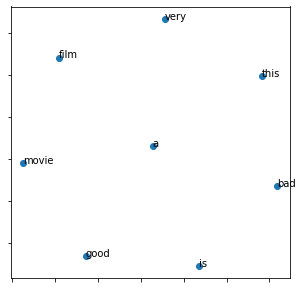

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import sys

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [45]:
# test_dataの内容を取り出す
for sample in test_dataset:
    print(sample)

This movie is SOOOO funny!!!
What a movie! I never
best movie ever!!!!! this movie


In [46]:
# test_dataから記号を除去
str = test_dataset[0]

for i in test_dataset:
    print(re.sub(re.compile("[!-/:-@[-`{-~]"), '', i))

This movie is SOOOO funny
What a movie I never
best movie ever this movie


In [47]:
#x_train
print(type(x_train))
print(len(x_train))

<class 'list'>
25000


In [48]:
print(x_train[:4])

["Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.", 'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many cliché

In [49]:
#x_trainの特殊文字の除去
new_x_train = [] # 特殊文字除去後のx_trainのリスト
for sample in x_train:
    new_sample = re.sub(re.compile("[!-/:-@[-`{-~]"), '', sample)
    new_x_train.append(new_sample)
    
#new_x_trainのURLの除去
new_x_train = [s.replace("https?://[\w/:%#\$&\?\(\)~\.=\+\-]+", \
                             ' ') for s in new_x_train]

# new_x_trainの大文字の小文字化
x_train_transform = []
for sample in new_x_train:
    sample = sample.lower()
    x_train_transform.append(sample)

# 単語をリストで分割
x_train_zero = []
for sample in x_train_transform[:4]:
    sample = sample.split()
    x_train_zero.append(sample)

# 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [50]:
from gensim.models import Word2Vec
sentences = x_train_zero
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print(f"語彙の一覧 : {model.wv.vocab.keys()}")

for vocab in model.wv.vocab.keys():
  print(f"{vocab}のベクトル : \n{model.wv[vocab]}")

語彙の一覧 : dict_keys(['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 'rethink', 'why', 'two', 'boysyoung', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmates', 'it', 'captures', 'must', 'be', 'beyond', 'a', 'bizarre', 'mode', 'of', 'being', 'for', 'humans', 'who', 'have', 'decided', 'withdraw', 'from', 'common', 'civility', 'in', 'order', 'define', 'ownmutual', 'world', 'coupled', 'destructionbr', 'br', 'is', 'not', 'perfect', 'movie', 'but', 'given', 'moneytime', 'the', 'filmmaker', 'and', 'actors', 'had', 'remarkable', 'product', 'terms', 'explaining', 'motives', 'actions', 'young', 'suicidemurderers', 'better', 'than', 'elephant', 'film', 'that', 'gets', 'under', 'our', 'rationalistic', 'skin', 'far', 'almost', 'anything', 'are', 'likely', 'see', 'flawed', 'honest', 'with', 'terrible', 'honesty', 'words', 'cant', 'describe', 'how', 'bad', 'this', 'i', 'explain', 'by', 'writing', 'only', 'too', 'yourself', 'get'

C:\Users\ykenk\Anaconda3\envs\tf_keras\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


# 【問題7】ベクトルの可視化  
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。  

## 学習済みベクトル  
巨大なコーパスで学習して得たベクトルも公開されているため、自分で学習をせずに利用することもできます。オリジナルのWord2Vecの他に同じ作者の発展系である__FastText__やスタンフォード大の__GloVe__があり、それぞれ公開されています。

C:\Users\ykenk\Anaconda3\envs\tf_keras\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


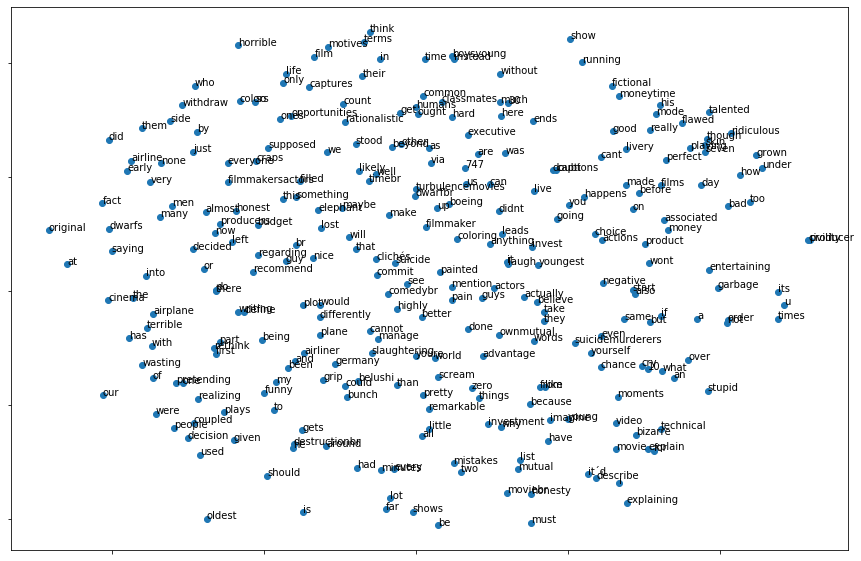

In [51]:
from sklearn.manifold import TSNE
import sys

vocabs = model.wv.vocab.keys()

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題8】（アドバンス課題）Word2Vecを用いた映画レビューの分類
問題6で学習して得たベクトルや公開されている学習済みベクトルを用いてIMDB映画レビューデータセットの感情分類の学習・推定を行なってください。

## やっていない。